## Multiple Linear Regression
This concept of linear can be extended to cases where there are more than two variables. This is called **multiple linear regression**. For instance, consider a scenario where you have to predict the price of the house based upon its area, number of bedrooms, the average income of the people in the area, the age of the house, and so on. In this case, the dependent variable (target variable) is dependent upon several independent variables. A regression model involving multiple variables can be represented as:  
  
\begin{equation}
y=\ b_0+m_1x_1\ +m_2x_2+m_3x_3+\ldots+m_nx_n  
\end{equation}  
  
This is the equation of a hyperplane. A linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyperplane.
![](images/multiple_linear_regression.png)
You can use the multiple linear regression to find out which factor has the highest impact on the predicted output and how different variables relate to each other.
### Case advertising
What are the features?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper
What is the response?
- Sales: sales of a single product in a given market (in thousands of items)
What else do we know?
- Because the response variable is continuous, this is a regression problem.
- There are 200 observations (represented by the rows), and each observation is a single market.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Read the file Advertising.csv
data = pd.read_csv('data/advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [15]:
# Give the dimensions of the dataset
data.shape

(200, 5)

In [16]:
# Drop the column Unnamed: 0
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
import math

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

def rounddown(x):
    return int(math.floor(x / 10.0)) * 10

Text(0, 0.5, 'Sales')

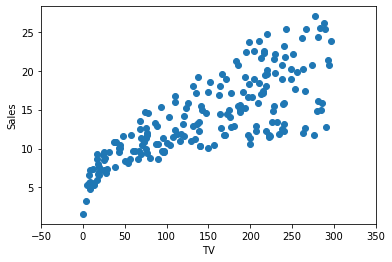

In [18]:
# Plot the dataset Sales vs TV
# First calculate the minimum and the maximumvalue for TV

xminTV = rounddown(data['TV'].min()) - 50
xmaxTV = roundup(data['TV'].max()) + 50

plt.scatter(data['TV'], data['Sales'])
plt.xlim([xminTV, xmaxTV])
plt.xlabel('TV')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

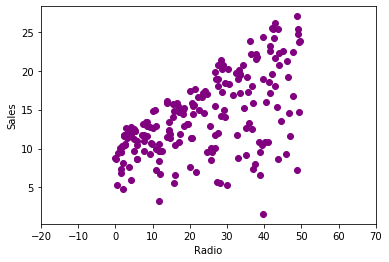

In [19]:
# Plot the dataset Sales vs Radio
# First calculate the minimum and the maximumvalue for Radio

xminRadio = rounddown(data['Radio'].min()) - 20
xmaxRadio = roundup(data['Radio'].max()) + 20

plt.scatter(data['Radio'], data['Sales'], color='purple')
plt.xlim([xminRadio, xmaxRadio])
plt.xlabel('Radio')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

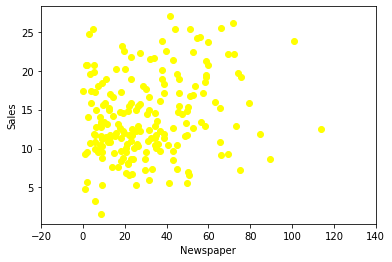

In [20]:
# Plot the dataset Sales vs Newspaper
# First calculate the minimum and the maximumvalue for Newspaper

xminNewspaper = rounddown(data['Newspaper'].min()) - 20
xmaxNewspaper = roundup(data['Newspaper'].max()) + 20

plt.scatter(data['Newspaper'], data['Sales'], color='yellow')
plt.xlim([xminNewspaper, xmaxNewspaper])
plt.xlabel('Newspaper')
plt.ylabel('Sales')

Form of linear regression  
  
\begin{equation}
y=\ b_0+m_1x_1\ +m_2x_2+m_3x_3+\ldots+m_nx_n
\end{equation}
  
- $y$ = the response
- $b_0$ = intercept
- $m_1$ = coefficient for $x_1$ (the first feature)
- $m_2$ = coefficient for $x_2$ (the second feature)
- …
- $m_n$ = coefficient for $x_n$ (the $n^{th}$ feature)  
    
In this case:  
  
\begin{equation}
y=\ b_0+m_1\ast\ TV\ +m_2\ast\ Radio+m_3\ast\ Newspaper
\end{equation}  
  
$m_1$, $m_2$ en $m_3$ are the model coefficients. These values are "learned" during the model fitting step using the _least squares_ criterion. Then, the fitted model can be used to make predictions. 


In [21]:
# Use LinearRegression to predict the Sales
from sklearn.model_selection import train_test_split
X = data.drop('Sales',axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [22]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [24]:
# First we are using LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the coefficients:
print("Coefficients")
print(model.coef_)

Intercept
3.0303203591416192

Coefficients
[0.04758891 0.17324881 0.00411952]


Depending on the random split in training and test set we get something like
  
\begin{equation}
y=\ 2.99+0.0448\ast\ TV\ +0.191\ast\ Radio-0.003\ast\ Newspaper
\end{equation}  
  
How do we interpret the TV coefficient (0.0448)?  
  
For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0468 "unit" increase in Sales. Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1000 spent on TV ads is associated with an increase in sales of 44.8 items.  
  
Important notes:
- This is a statement of correlation, not causation
- An increase in Newspaper ad spending is associated with a decrease in sales because the Newspaper coefficient is negative.  
  
Finally, let's calculate the common evaluation metrics for regression problems. 

In [25]:
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 1.3046420399153504

Mean Squared Error: 3.0339274271223067

Root Mean Squared Error: 1.7418172771913554

R square: 0.8786156588740994

